<img src="https://images.pexels.com/photos/920382/pexels-photo-920382.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500.jpg" width="1000px">



**Importing Some Basic Libraries**

In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir('../input'))

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

['online_shoppers_intention.csv']


**Attribute Information:**

* * The dataset consists of 10 numerical and 8 categorical attributes. 
* The 'Revenue' attribute can be used as the class label. 
* 
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



**Reading the Dataset**

In [2]:
# reading the dataset

data = pd.read_csv('../input/online_shoppers_intention.csv')

# checking the shape of the data
data.shape

(12330, 18)

**Some Analysis to Understand the Data**

In [3]:
# checking the head of the data

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# describing the data

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# checking if the data contains any NULL values

data.isnull().sum().sum()

112

**Uni-Variate Analysis of the Data**

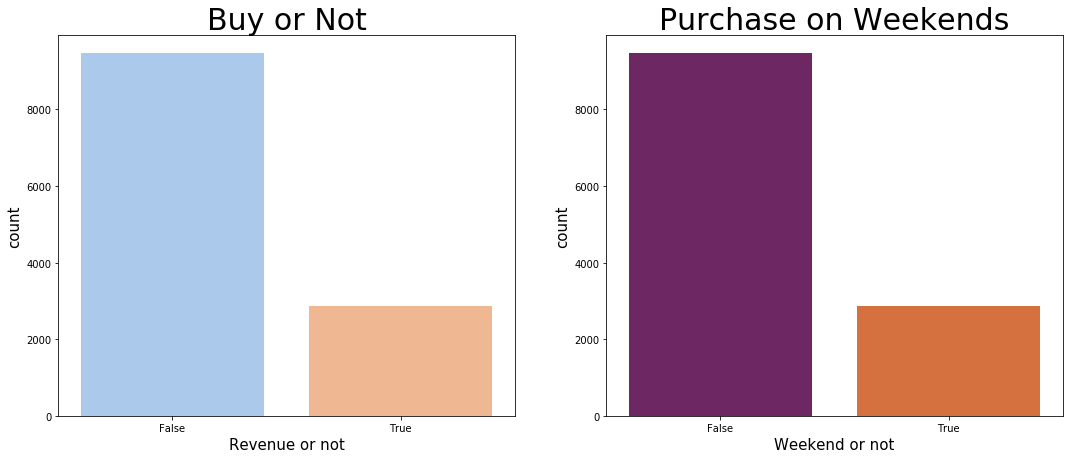

In [6]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [7]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

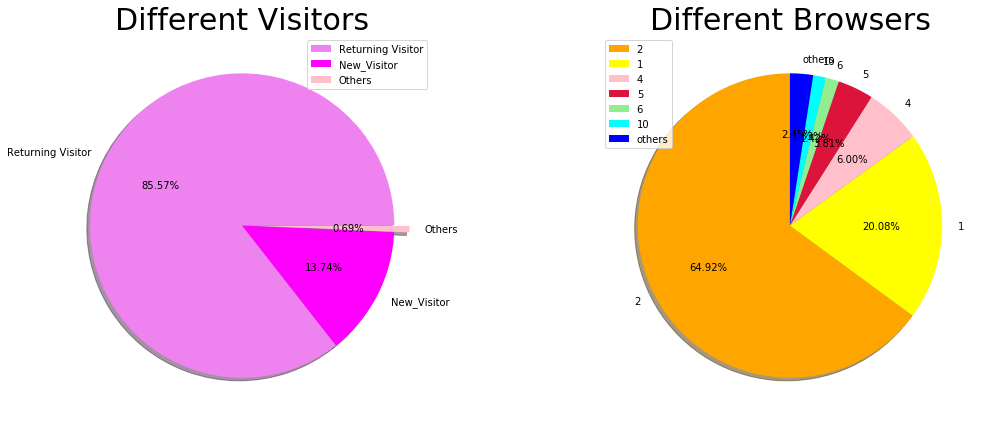

In [8]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

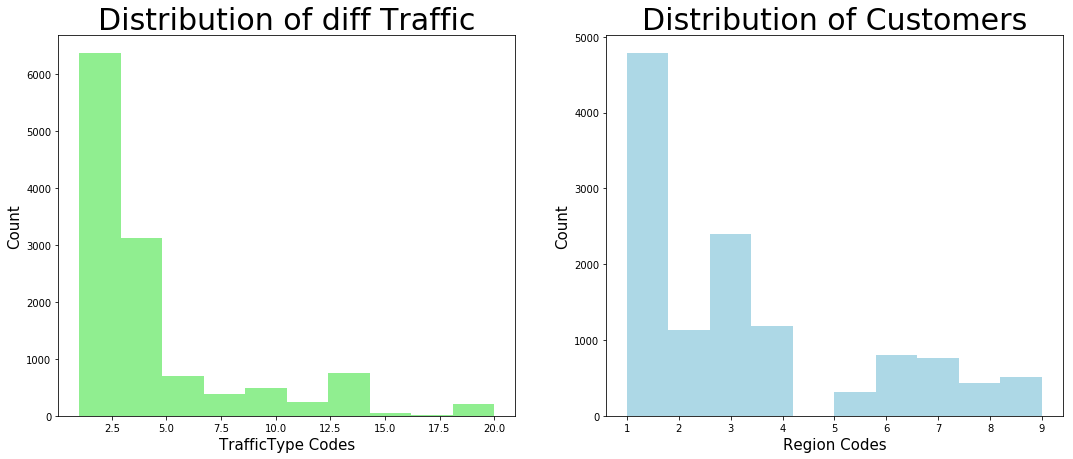

In [9]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [10]:
# checking the no. of OSes each user is having

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [11]:
#checking the months with most no.of customers visiting the online shopping sites

data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

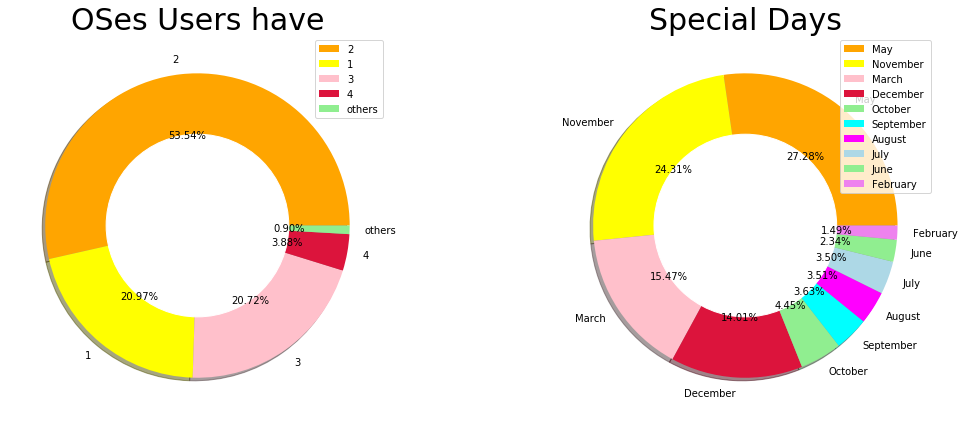

In [12]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

**Bi-Variate Analysis**

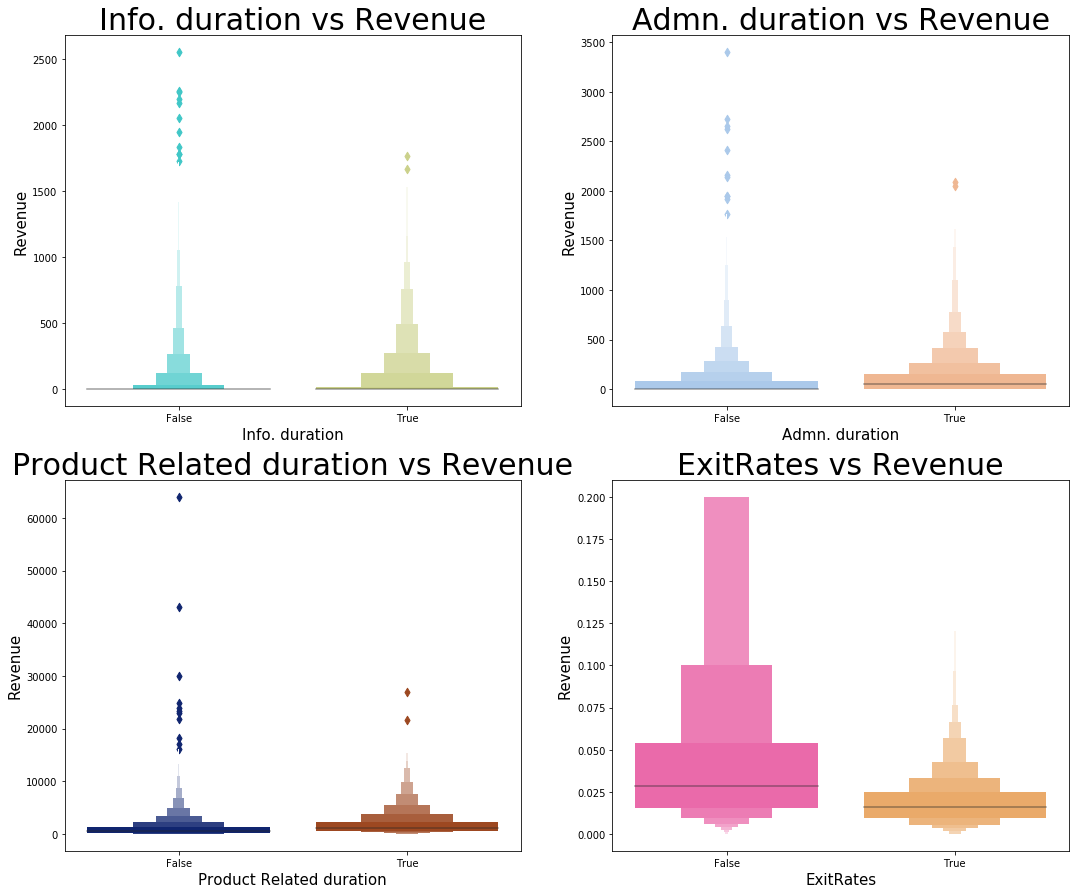

In [13]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()


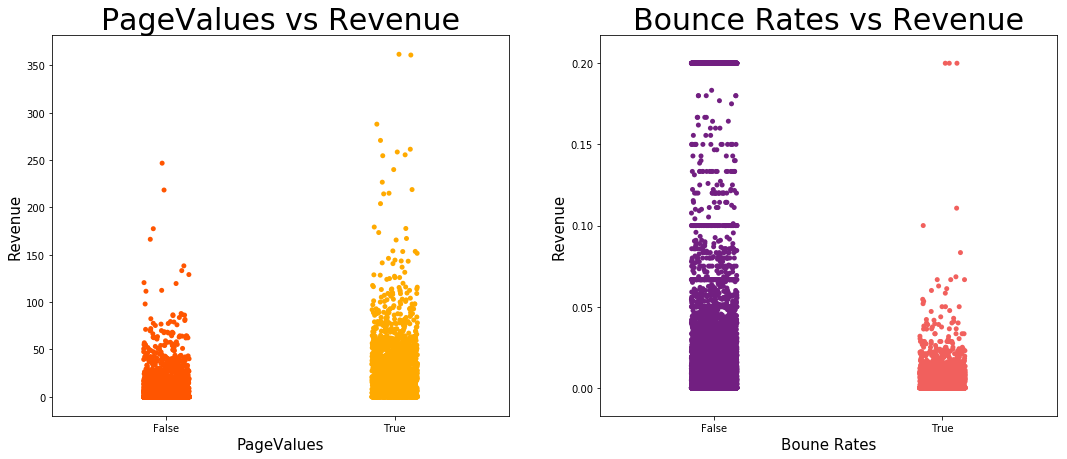

In [14]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

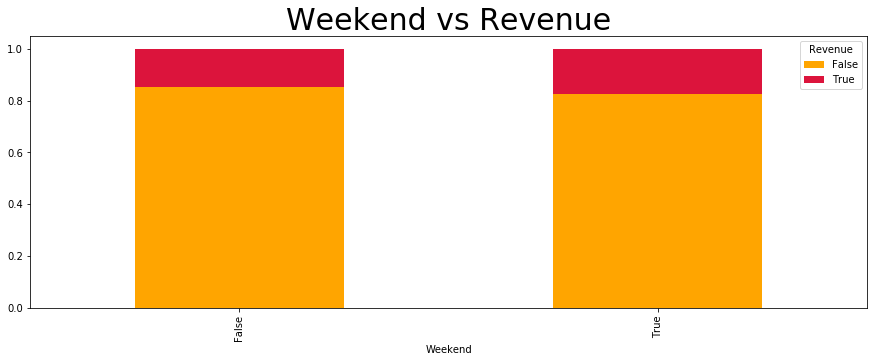

In [15]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

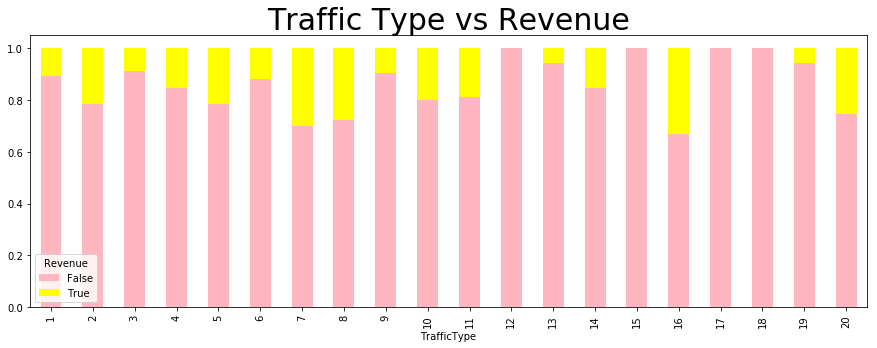

In [16]:
# Traffic Type vs Revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

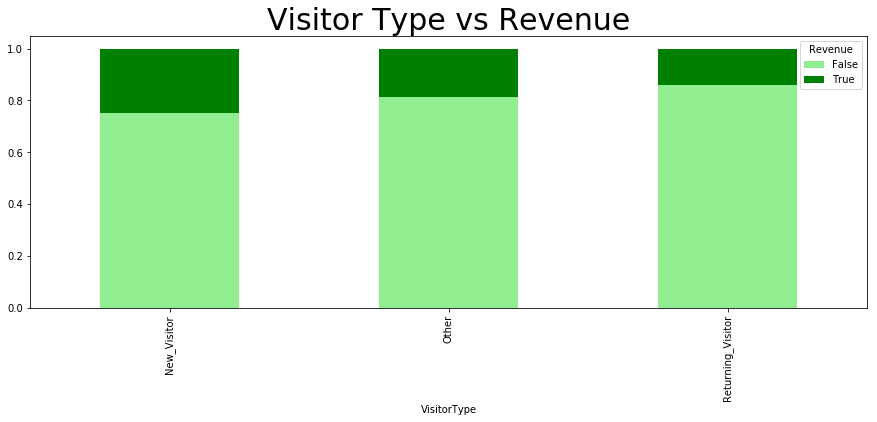

In [17]:
# visitor type vs revenue

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


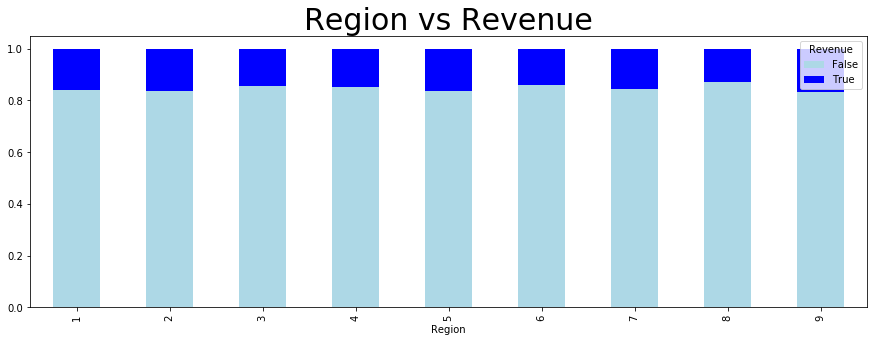

In [18]:
# region vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'LM Plot between Admistrative and Information')

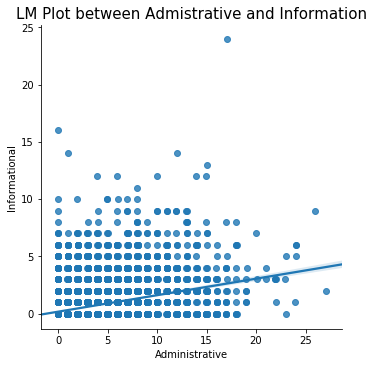

In [19]:
# lm plot

plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', data = data, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)


**Multi-Variate Analysis**

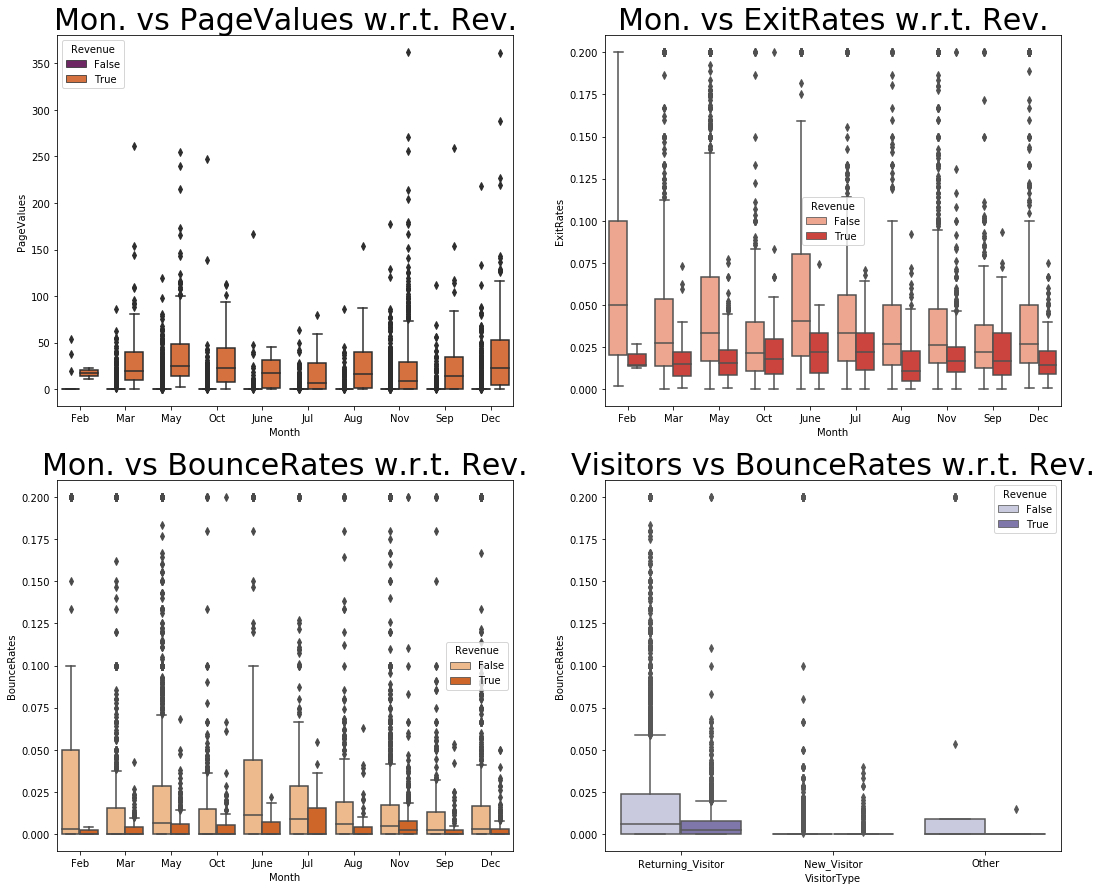

In [20]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



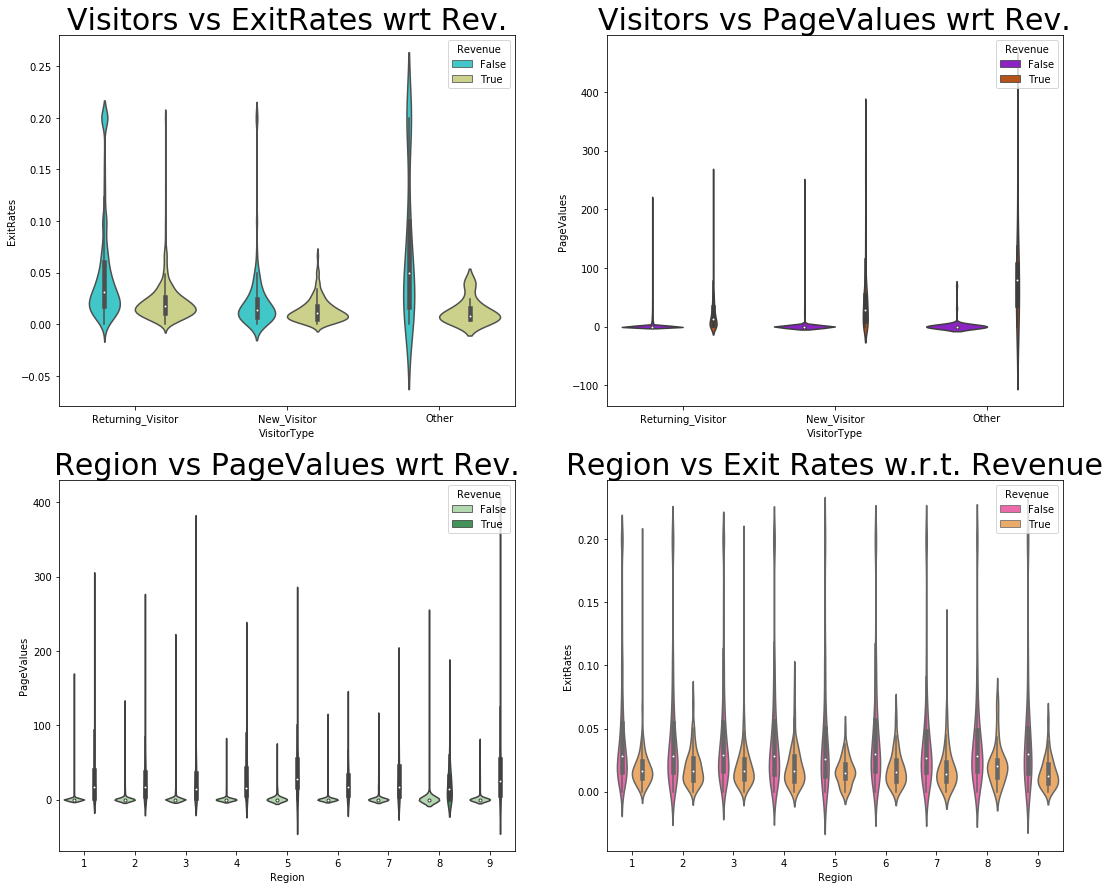

In [21]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

In [22]:
# Inputing Missing Values with 0

data.fillna(0, inplace = True)

# checking the no. of null values in data after imputing the missing values
data.isnull().sum().sum()

0

## Clustering Analysis

## Trying to learn the user characteristics of in terms of time spent on the Website


**1. Administrative Duration vs Bounce Rate**

**The Elbow Method to Find out the Maximum no. of Optimal Clusters**

> Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from   1 to 10 clusters.

> For each k, calculate the total within-cluster sum of square (wss).

> Plot the curve of wss according to the number of clusters k.

> The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of       clusters.

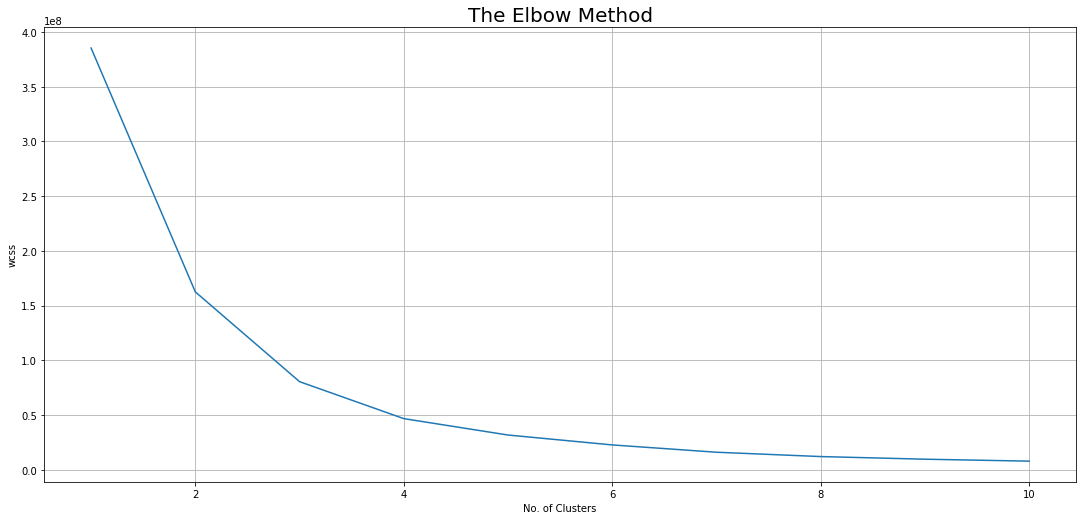

In [23]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three.
Let's go to the next step, i.e., Plotting the Clusters.**

**Visualizing the Cluster using Scatter Plot.**

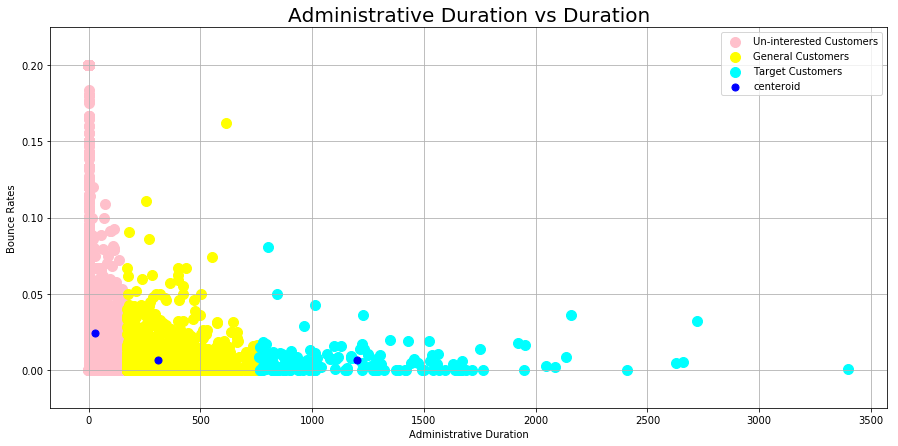

In [24]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

**By,  Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.**

**There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a w**

### 2. Informative Duration vs Bounce Rates

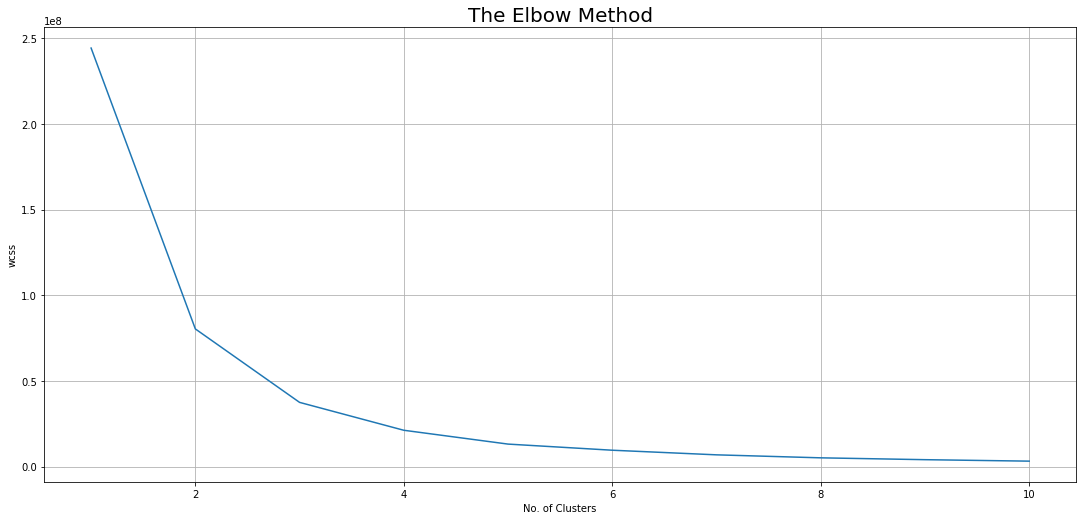

In [25]:
# informational duration vs Bounce Rates
x = data.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

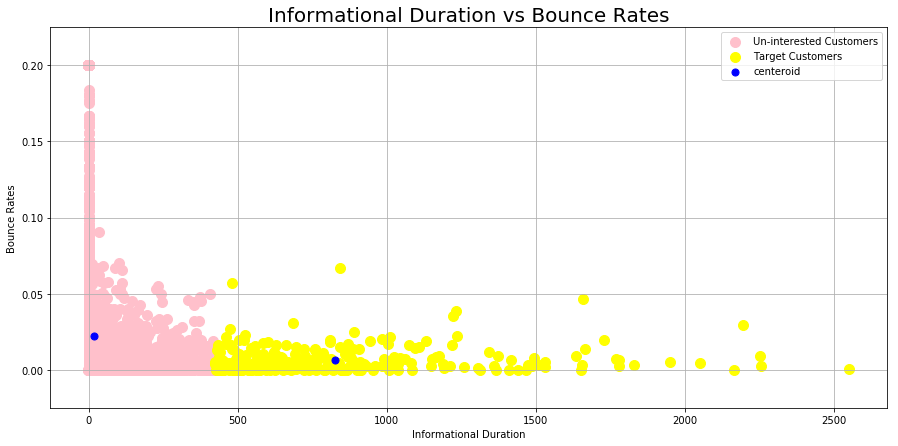

In [26]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

**3.Administrative Duration vs Exit Rates**

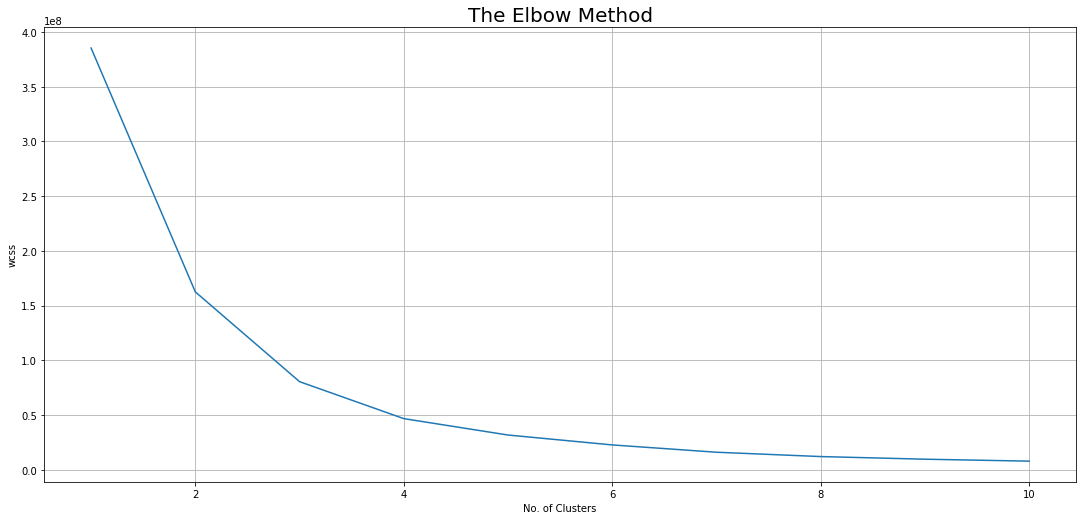

In [27]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

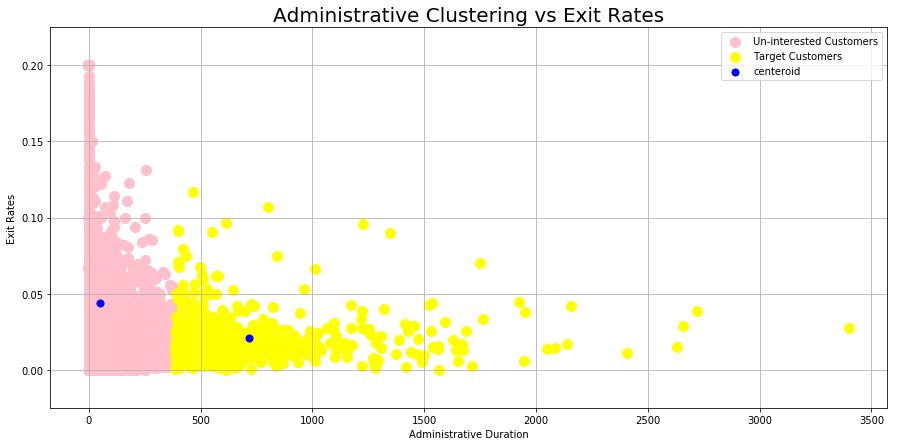

In [28]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

## Where from the Users of the Website come?

### 1. Region vs Traffic Type

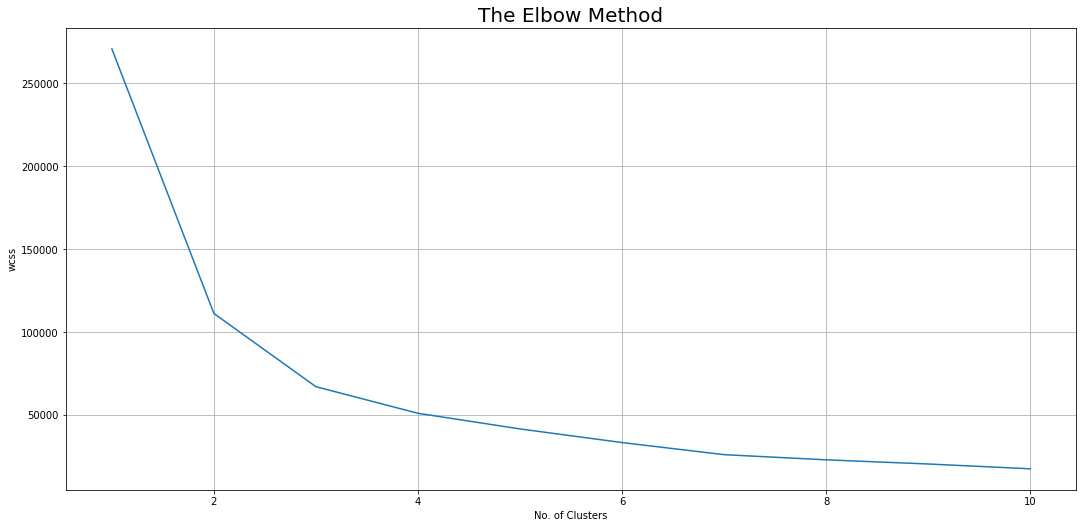

In [29]:
# informational duration vs Bounce Rates
x = data.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

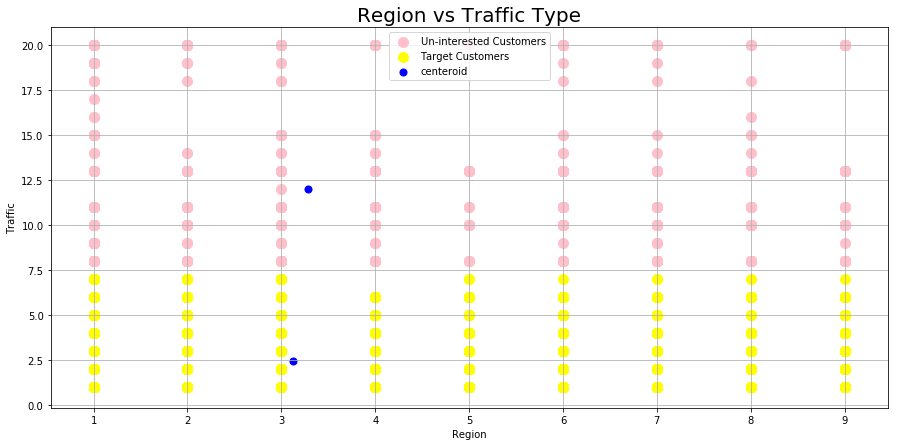

In [30]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

### 2. Adminstrative Duration vs Region

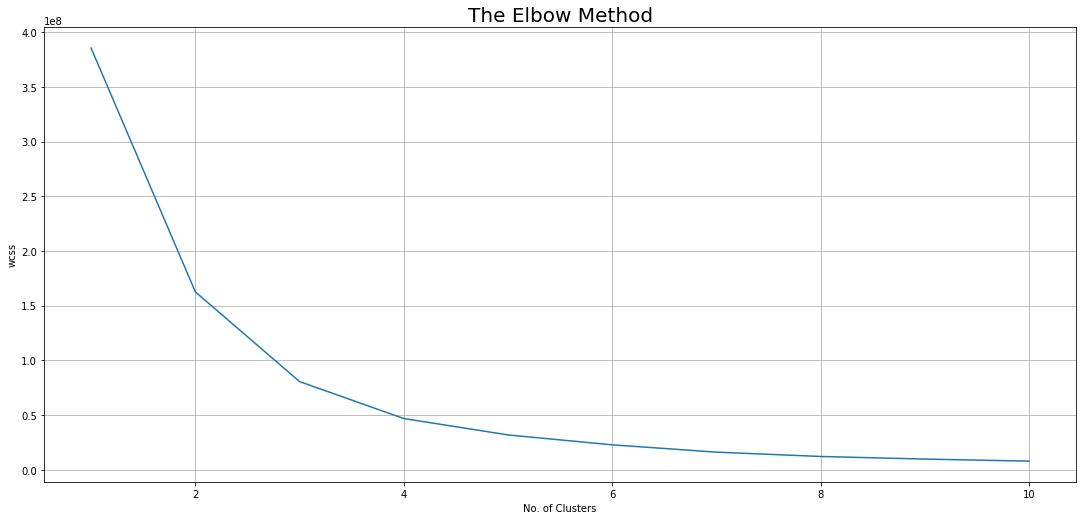

In [31]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

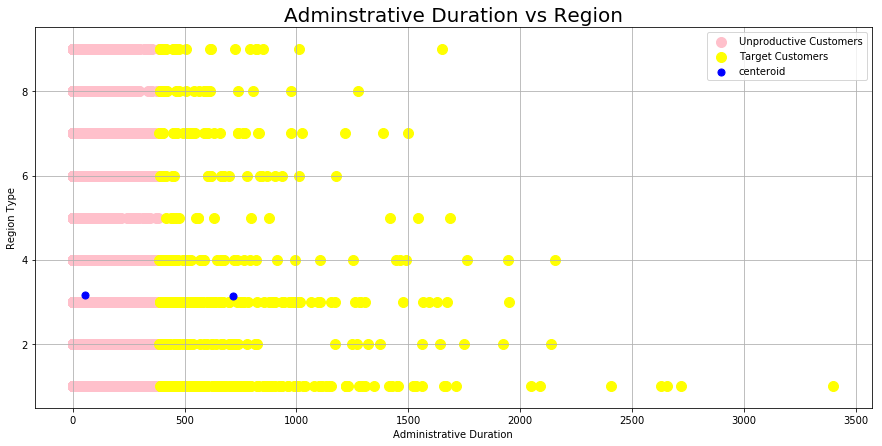

In [32]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

## Data Preprocessing

**One Hot and Label Encoding**

In [33]:
# one hot encoding 

data1 = pd.get_dummies(data)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [34]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [35]:
# getting dependent and independent variables

x = data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (12330, 28)
Shape of y: (12330,)


**Splitting of the Data**

In [36]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


**Random Forest Classifier**

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Training Accuracy : 0.991773838489167
Testing Accuracy : 0.8807785888077859
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3077
           1       0.72      0.47      0.57       622

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.81      0.72      0.75      3699
weighted avg       0.87      0.88      0.87      3699



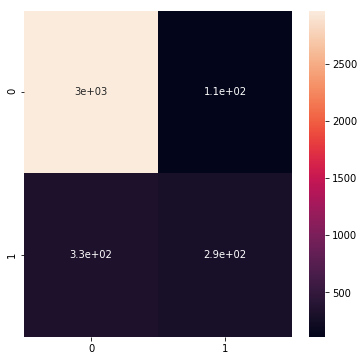

In [37]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

**Evaluating Model**

In [38]:
# finding the Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.1080 ± 0.0072,PageValues
0.0045 ± 0.0049,Month_Nov
0.0045 ± 0.0024,BounceRates
0.0044 ± 0.0043,ProductRelated
0.0025 ± 0.0024,Administrative
0.0019 ± 0.0032,ExitRates
0.0005 ± 0.0029,Administrative_Duration
0.0003 ± 0.0009,Month_Sep
0.0003 ± 0.0025,ProductRelated_Duration
0 ± 0.0000,Month_Feb


**Partial Dependency Plots**

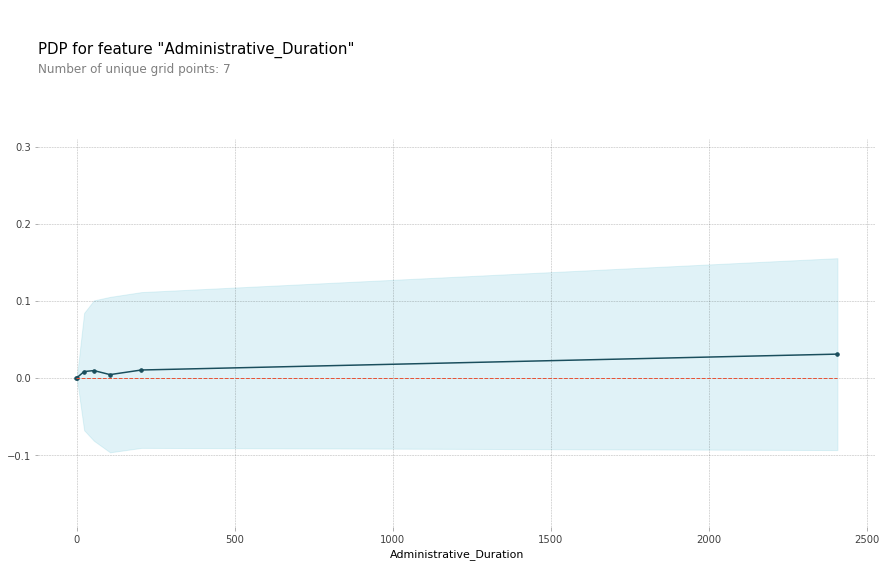

In [39]:
# plotting the partial dependence plot for adminisrative duration

# importing pdp
from pdpbox import pdp, info_plots

base_features = x_test.columns.values.tolist()

feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

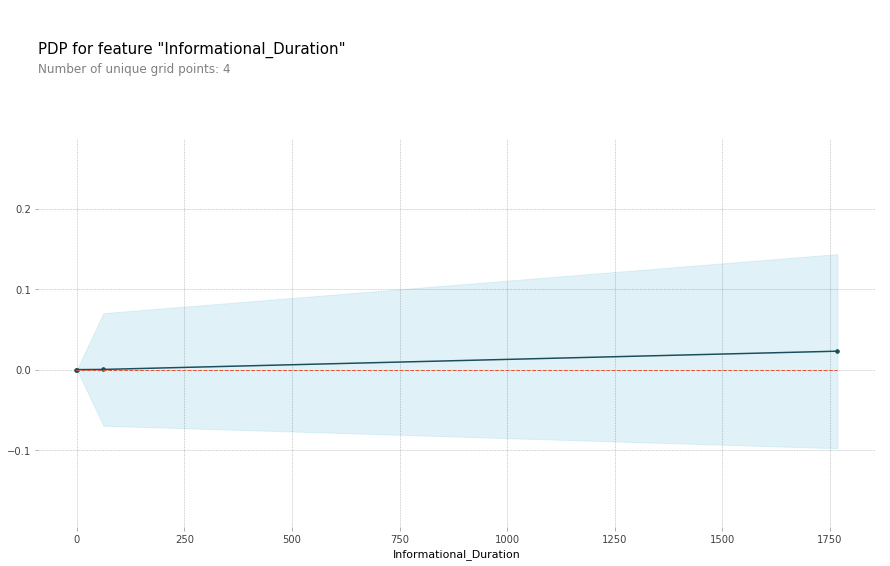

In [40]:
# plotting partial dependency plot for Informational Duration

base_features = x_test.columns.tolist()

feat_name = 'Informational_Duration'
pdp_dist = pdp.pdp_isolate(model, x_test, base_features, feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Shap Values**

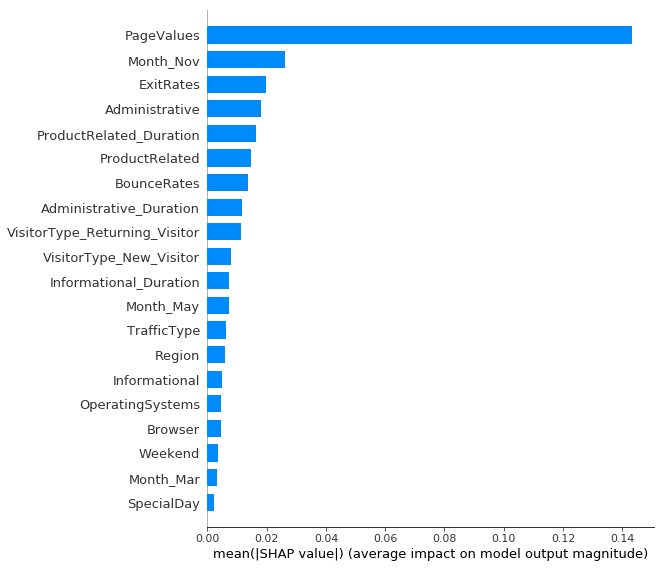

In [41]:
# let's take a look at the shap values

# importing shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type = 'bar')

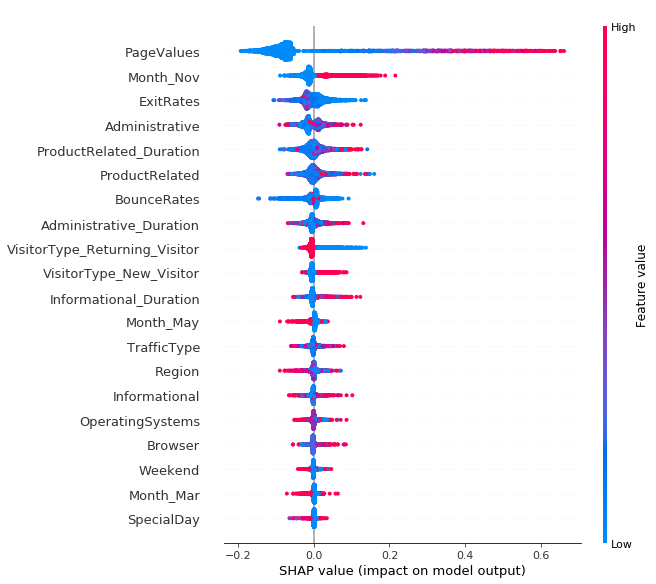

In [42]:
shap.summary_plot(shap_values[1], x_test)

**Customer Analysis**

In [43]:
# let's create a function to check the customer's conditions

def customer_analysis(model, customer):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(customer)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], customer)

In [44]:
# let's do some real time prediction for patients

customers = x_test.iloc[1,:].astype(float)
customer_analysis(model, customers)

In [45]:
# let's do some real time prediction for patients

customers = x_test.iloc[15,:].astype(float)
customer_analysis(model, customers)

In [46]:
# let's do some real time prediction for patients

customers = x_test.iloc[100,:].astype(float)
customer_analysis(model, customers)

In [47]:
# let's do some real time prediction for patients

customers = x_test.iloc[150,:].astype(float)
customer_analysis(model, customers)

In [48]:
# let's do some real time prediction for patients

customers = x_test.iloc[200,:].astype(float)
customer_analysis(model, customers)

**Force Plot**

In [49]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])